In [ ]:
# !conda install geopandas

In [1]:
import geopandas as gpd

In [2]:
%matplotlib inline

In [3]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

In [4]:
gpd.datasets.available

['naturalearth_cities', 'naturalearth_lowres', 'nybb']

In [5]:
world_cities = gpd.read_file(gpd.datasets.get_path('naturalearth_cities'))

In [6]:
world.head()

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,28400000.0,Asia,Afghanistan,AFG,22270.0,"POLYGON ((61.21081709172574 35.65007233330923,..."
1,12799293.0,Africa,Angola,AGO,110300.0,(POLYGON ((16.32652835456705 -5.87747039146621...
2,3639453.0,Europe,Albania,ALB,21810.0,"POLYGON ((20.59024743010491 41.85540416113361,..."
3,4798491.0,Asia,United Arab Emirates,ARE,184300.0,"POLYGON ((51.57951867046327 24.24549713795111,..."
4,40913584.0,South America,Argentina,ARG,573900.0,(POLYGON ((-65.50000000000003 -55.199999999999...


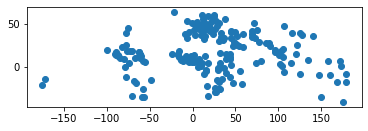

In [7]:
world_cities.plot();

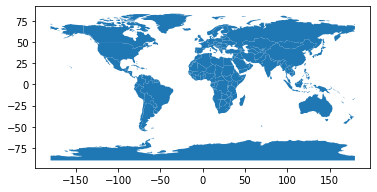

In [8]:
world.plot();

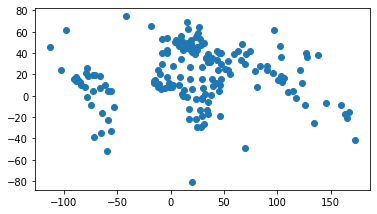

In [9]:
world['centroid_column'] = world.centroid 
world = world.set_geometry('centroid_column')  # 중심점 기준으로 축을 바꿔준다. 
world.plot()

In [10]:
world.geometry.name

'centroid_column'

In [11]:
import fiona

In [12]:
fiona.supported_drivers

{'ARCGEN': 'r',
 'AeronavFAA': 'r',
 'BNA': 'raw',
 'DGN': 'raw',
 'DXF': 'raw',
 'ESRI Shapefile': 'raw',
 'GPKG': 'rw',
 'GPSTrackMaker': 'raw',
 'GPX': 'raw',
 'GeoJSON': 'rw',
 'Idrisi': 'r',
 'MapInfo File': 'raw',
 'OpenFileGDB': 'r',
 'PCIDSK': 'r',
 'SEGY': 'r',
 'SUA': 'r'}

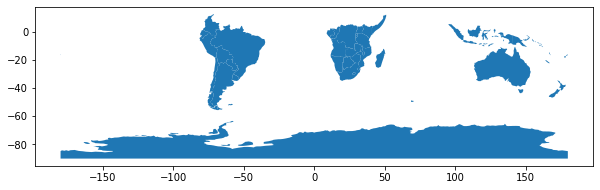

In [11]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres')) 
southern_world = world.cx[:, :0]
southern_world.plot(figsize=(10, 3))

In [13]:
world

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,28400000.0,Asia,Afghanistan,AFG,22270.0,"POLYGON ((61.21081709172574 35.65007233330923,..."
1,12799293.0,Africa,Angola,AGO,110300.0,(POLYGON ((16.32652835456705 -5.87747039146621...
2,3639453.0,Europe,Albania,ALB,21810.0,"POLYGON ((20.59024743010491 41.85540416113361,..."
3,4798491.0,Asia,United Arab Emirates,ARE,184300.0,"POLYGON ((51.57951867046327 24.24549713795111,..."
4,40913584.0,South America,Argentina,ARG,573900.0,(POLYGON ((-65.50000000000003 -55.199999999999...
5,2967004.0,Asia,Armenia,ARM,18770.0,"POLYGON ((43.58274580259273 41.09214325618257,..."
6,3802.0,Antarctica,Antarctica,ATA,760.4,(POLYGON ((-59.57209469261153 -80.040178725096...
7,140.0,Seven seas (open ocean),Fr. S. Antarctic Lands,ATF,16.0,"POLYGON ((68.935 -48.62500000000001, 69.58 -48..."
8,21262641.0,Oceania,Australia,AUS,800200.0,(POLYGON ((145.3979781434948 -40.7925485166058...
9,8210281.0,Europe,Austria,AUT,329500.0,"POLYGON ((16.97966678230404 48.12349701597631,..."


C:\Users\skarn\Anaconda3\envs\DataAnalysis\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


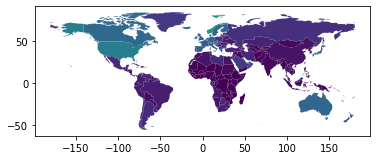

In [14]:
world = world[(world.pop_est>0) & (world.continent!="Antarctica")] 
world['gdp_per_cap'] = world.gdp_md_est / world.pop_est 
world.plot(column='gdp_per_cap')

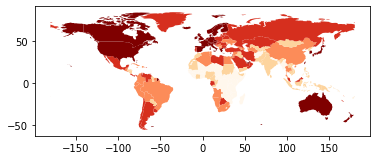

In [15]:
world.plot(column='gdp_per_cap', cmap='OrRd', scheme='quantiles')

In [35]:
seoul = gpd.read_file('asset/seoul_shp',engine='python')

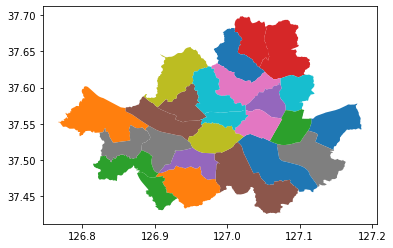

In [36]:
seoul.plot(column='name')

In [37]:
seoul.head()

,code,name,name_eng,base_year,geometry
0,11250,ê°ëêµ¬,Gangdong-gu,2013,"POLYGON ((127.1151958498161 37.55753318070492,..."
1,11240,ì¡íêµ¬,Songpa-gu,2013,"POLYGON ((127.0690698130372 37.52227942350503,..."
2,11230,ê°ë¨êµ¬,Gangnam-gu,2013,"POLYGON ((127.058673592884 37.52629974922568, ..."
3,11220,ìì´êµ¬,Seocho-gu,2013,"POLYGON ((127.0139711966751 37.52503988289669,..."
4,11210,ê´ì êµ¬,Gwanak-gu,2013,"POLYGON ((126.9610898906183 37.49100376129394,..."


In [38]:
seoul['coords'] = seoul['geometry'].apply(lambda x: x.representative_point().coords[:])
seoul['coords'] = [coords[0] for coords in seoul['coords']]

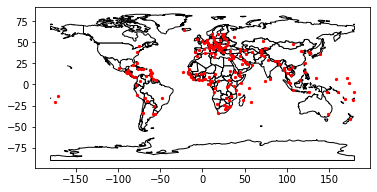

In [39]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres')) 
cities = gpd.read_file(gpd.datasets.get_path('naturalearth_cities')) 
 

base = world.plot(color='white', edgecolor='black')

cities.plot(ax=base, marker='o', color='red', markersize=5);

In [40]:
import matplotlib.pyplot as plt

C:\Users\skarn\Anaconda3\envs\DataAnalysis\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 149 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\skarn\Anaconda3\envs\DataAnalysis\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 143 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\skarn\Anaconda3\envs\DataAnalysis\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 153 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\skarn\Anaconda3\envs\DataAnalysis\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 149 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\skarn\Anaconda3\envs\DataAnalysis\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 143 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\skarn\Anaconda3\envs\DataAnalysis\lib\si

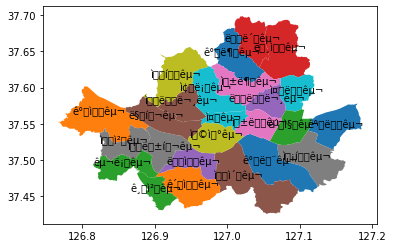

In [41]:
seoul.plot(column='name')
for idx, row in seoul.iterrows():
    plt.annotate(s=row['name'], xy=row['coords'],
                 horizontalalignment='center')

In [42]:
font_list = fm.findSystemFonts(fontpaths=None, fontext='ttf')
print(font_list)

NameError: name 'fm' is not defined

In [ ]:
import matplotlib.font_manager as fm
plt.rcParams["font.family"] = 'Malgun Gothic'
plt.rcParams["font.size"] = 12
plt.rcParams["figure.figsize"] = (14,4)



In [43]:
import matplotlib.pyplot as plt

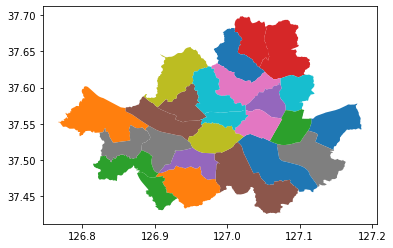

In [44]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
seoul.plot(ax= ax, column='name')


In [45]:
seoul_x = seoul.centroid.apply(lambda p: p.x)
seoul_y = seoul.centroid.apply(lambda p: p.y)

In [46]:
len(seoul_x)

25

In [47]:
seoulcen = seoul.copy()
seoulcen['geometry'] = seoul.geometry.centroid

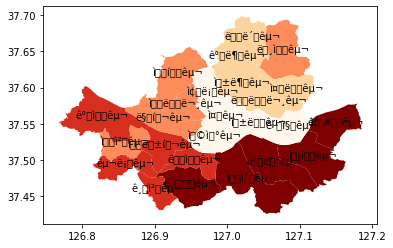

In [48]:
seoul.plot(column='code', cmap='OrRd', scheme='quantiles')
for idx, row in seoulcen.iterrows():
    plt.annotate(s=row['name'], xy=[row['geometry'].x,row['geometry'].y],
                 horizontalalignment='center')

In [49]:
for name,centroid in zip(seoul.name,seoul.centroid):
    print(i)
    #plt.text(centroid, name, fontsize=12)

NameError: name 'i' is not defined

In [50]:
world.head()

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,28400000.0,Asia,Afghanistan,AFG,22270.0,"POLYGON ((61.21081709172574 35.65007233330923,..."
1,12799293.0,Africa,Angola,AGO,110300.0,(POLYGON ((16.32652835456705 -5.87747039146621...
2,3639453.0,Europe,Albania,ALB,21810.0,"POLYGON ((20.59024743010491 41.85540416113361,..."
3,4798491.0,Asia,United Arab Emirates,ARE,184300.0,"POLYGON ((51.57951867046327 24.24549713795111,..."
4,40913584.0,South America,Argentina,ARG,573900.0,(POLYGON ((-65.50000000000003 -55.199999999999...


In [51]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Check original projection
# (it's Platte Carre! x-y are long and lat)
world.crs

{'init': 'epsg:4326'}

Text(0.5, 1, 'WGS84 (lat/lon)')

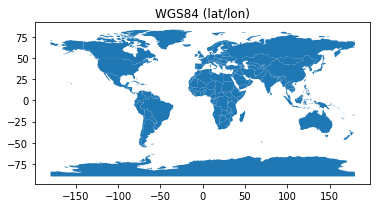

In [52]:
# Visualize
ax = world.plot()

ax.set_title("WGS84 (lat/lon)")

In [53]:
# Reproject to Mercator (after dropping Antartica)
world = world[(world.name != "Antarctica") & (world.name != "Fr. S. Antarctic Lands")]

world = world.to_crs({'init': 'epsg:3395'}) # world.to_crs(epsg=3395) would also work

ax = world.plot()

ax.set_title("Mercator");

RuntimeError: b'no arguments in initialization list'

In [ ]:
from shapely.geometry import Polygon

p1 = Polygon([(0, 0), (1, 0), (1, 1), (0, 1)])
p2 = Polygon([(0, 0), (1, 0), (1, 1)])
p3 = Polygon([(2, 0), (3, 0), (3, 1), (2, 1)])

g = gpd.GeoSeries([p1, p2, p3])
g.plot(cmap='Pastel1')


In [54]:
g.buffer(0.5).plot(cmap='Pastel1')

NameError: name 'g' is not defined

In [55]:
nybb_path = gpd.datasets.get_path('nybb')
boros = gpd.GeoDataFrame.from_file(nybb_path) 
boros.set_index('BoroCode', inplace=True)
boros = boros.sort_index()
boros

,BoroName,Shape_Leng,Shape_Area,geometry
BoroCode,,,,
1,Manhattan,359299.096471,6.364715e+08,(POLYGON ((981219.0557861328 188655.3157958984...
2,Bronx,464392.991824,1.186925e+09,(POLYGON ((1012821.805786133 229228.2645874023...
3,Brooklyn,741080.523166,1.937479e+09,(POLYGON ((1021176.479003906 151374.7969970703...
4,Queens,896344.047763,3.045213e+09,(POLYGON ((1029606.076599121 156073.8142089844...
5,Staten Island,330470.010332,1.623820e+09,(POLYGON ((970217.0223999023 145643.3322143555...


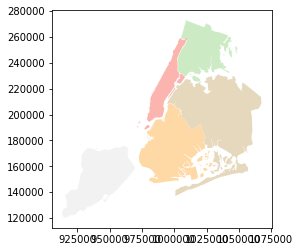

In [56]:
boros.plot(cmap='Pastel1')

In [57]:
from shapely.geometry import Point
import numpy as np

xmin, xmax, ymin, ymax = 900000, 1080000, 120000, 280000

xc = (xmax - xmin) * np.random.random(2000) + xmin

yc = (ymax - ymin) * np.random.random(2000) + ymin 

pts = gpd.GeoSeries([Point(x, y) for x, y in zip(xc, yc)])

In [58]:
circles = pts.buffer(2000)

In [117]:
mp = circles.unary_union

In [118]:
holes = boros['geometry'].intersection(mp)

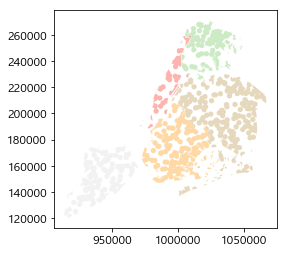

In [119]:
holes.plot(cmap='Pastel1')

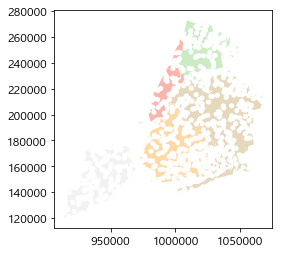

In [120]:
circles = pts.buffer(2000) # 2000 안에 있는 Points만 남김

mp = circles.unary_union # circles를 하나로 합침

boros_with_holes = boros['geometry'].difference(mp)

boros_with_holes.plot(cmap='Pastel1')

In [121]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
world = world[['continent', 'geometry']]
continents = world.dissolve(by='continent')
continents.head()

,geometry
continent,
Africa,(POLYGON ((49.54351891459575 -12.4698328589405...
Antarctica,(POLYGON ((-159.2081835601977 -79.497059421708...
Asia,(POLYGON ((120.7156087586305 -10.2395813940878...
Europe,(POLYGON ((-52.55642473001839 2.50470530843705...
North America,"(POLYGON ((-61.68000000000001 10.76, -61.105 1..."


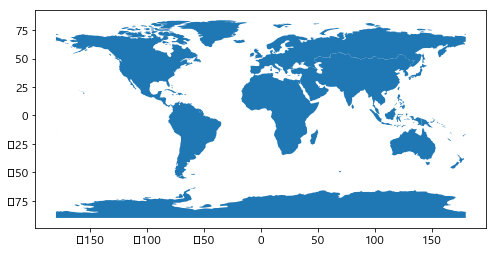

In [122]:
continents.plot()

In [123]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
world = world[['continent', 'geometry', 'pop_est']]
continents = world.dissolve(by='continent', aggfunc='sum')
continents.head()

,geometry,pop_est
continent,,
Africa,(POLYGON ((49.54351891459575 -12.4698328589405...,9.932819e+08
Antarctica,(POLYGON ((-159.2081835601977 -79.497059421708...,3.802000e+03
Asia,(POLYGON ((120.7156087586305 -10.2395813940878...,4.085853e+09
Europe,(POLYGON ((-52.55642473001839 2.50470530843705...,7.281312e+08
North America,"(POLYGON ((-61.68000000000001 10.76, -61.105 1...",5.393510e+08


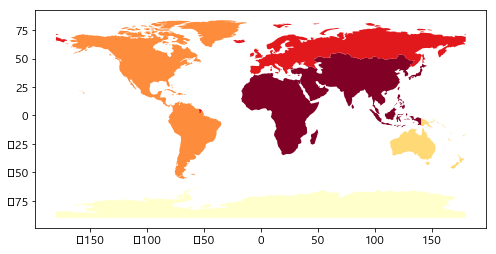

In [124]:
continents.plot(column = 'pop_est', scheme='quantiles', cmap='YlOrRd');